In [115]:
from pandas import DataFrame,Series
import pandas as pd
import wordcloud
import jieba
import re
import matplotlib.pyplot as plt

# 解决乱码问题
plt.rcParams["font.sans-serif"]=["SimHei"]
plt.rcParams["axes.unicode_minus"]=False

In [133]:
data = pd.read_csv("data.csv",encoding='gbk')
# 前几条数据
data.head()

,title,jobfirstclass,second_level_label,experience,jobsecondclass,enddate,size,education,first_level_label,officialname,type,salary,requirements,companydescription,loc
0,25664-大数据开发工程师（腾讯云全资子公司）(腾讯科技（深圳）有限公司),NaN,技术开发,3-5年,数据开发,2020/8/9,1000-9999人,本科,IT|互联网|通信|电子,腾讯科技（深圳）有限公司,全职,12000-20000,本科 3-5年,岗位要求：二、能力要求1、5年以上后台开发经验；2、精通Java研发框架和代码开发，熟悉Sp...,http://kg.baidu.com/od/4002/2011615/a2176611d0...
1,大数据开发工程师(北京中合利成电子商务有限公司),数据开发,技术开发,3-5年,NaN,2020/7/22,100-499人,本科,IT|互联网|通信|电子,禄劝中合利成电子商务有限公司,全职,12000-20000,本科 3年以上,岗位职责： 1、负责流计算平台的开发与优化工作 2、负责流式计算平台开发结合业务的应用、处理...,http://kg.baidu.com/od/4002/2004461/96c4e79d6b...
2,数据业务分析师,销售/客服/技术支持,广告/咨询,1-3年,销售人员,2020/12/15,100-499人,本科,广告|设计|编辑|翻译,北京睿至大数据有限公司,全职,面议,本科 1-3年,岗位概述：配合部门数据产品线经理开展部门大数据业务相关工作，执行公司相关战略；岗位职责:1、...,http://www.task51.com/job/270691.html
3,大数据开发工程师,可穿戴设备/智能家居/物联网,技术开发,不限,开发工程师,2020/8/15,NaN,本科,IT|互联网|通信|电子,西安九索数据技术股份有限公司,全职,8000-12000,本科 不限,岗位职责：3.负责大数据相关业务应用场景的，大数据平台方面解决方案设计与项目支持4.负责上述...,http://kg.baidu.com/od/4002/2010036/cf05357c17...
4,大数据开发工程师（21届）(北京云畅游戏科技股份有限公司),NaN,技术开发,1年以下,数据分析,2020/8/9,100-499人,本科,IT|互联网|通信|电子,北京云畅游戏科技股份有限公司,实习,4000-5000,本科 1年以下,岗位职责：1.负责基于Spark、SparkSQL、Hadoop开发BI分析报表；2.负责数...,http://kg.baidu.com/od/4002/2011615/2b801c5601...


In [37]:
# 后几条数据
data.tail()

,title,jobfirstclass,second_level_label,experience,jobsecondclass,enddate,size,education,first_level_label,officialname,type,salary,requirements,companydescription,loc
314,大数据分析架构师(三门峡崤云信息服务股份有限公司),架构师,技术开发,不限,NaN,2020/7/21,50-99人,本科,IT|互联网|通信|电子,三门峡崤云信息服务股份有限公司,全职,12000-20000,本科 不限,岗位职责： 1、从事海量数据分析、挖掘相关工作，给出数据分析报告或预测模型 2、能够熟练使用...,http://kg.baidu.com/od/4002/2004461/e20c86d76b...
315,大数据（安全方向）(三门峡崤云安全服务有限公司),数据仓库,财务/会计,3-5年,NaN,2020/6/24,50-99人,大专,会计|教育|金融|律师,三门峡崤云安全服务有限公司,全职,8000-12000,大专 3年以上,岗位职责： 1、负责公司数据安全规划的完善和跟进，能够及时发现推进过程中的问题，并能有效解决...,http://kg.baidu.com/od/4002/2004461/9e4e9942ce...
316,销售副总(九次方),高级管理/项目管理,客服,5-10年,高级管理,2020/7/31,1000-2000人,大专,销售|市场|客服|公关,九次方大数据信息集团有限公司,全职,8000-12000,大专 5年以上,职责描述： 1、根据公司整体经营策略，制定团队销售计划及市场拓展计划； 2、与行业纵队紧密配...,http://kg.baidu.com/od/4002/2004461/5840f3feca...
317,解决方案经理(九次方),房地产/建筑,贸易/采购,5-10年,房地产设计/室内设计,2020/7/29,1000-2000人,本科,司机|物流|贸易|保险,九次方大数据信息集团有限公司,全职,5000-8000,本科 5年以上,职责描述： 1、配合销售进行市场营销工作，包括与用户的需求交流、方案编写、方案宣讲等； 2、...,http://kg.baidu.com/od/4002/2004461/92d36cd1ec...
318,大客户经理(九次方),销售/客服/技术支持,销售,5-10年,销售人员,2020/7/2,1000-2000人,大专,销售|市场|客服|公关,九次方大数据信息集团有限公司,全职,3000-5000,大专 5年以上,职责描述： 与大客户进行沟通、销售，挖掘客户需求，找寻意向客户销售公司产品； 2.开拓市场、...,http://kg.baidu.com/od/4002/2004461/1d04f556d1...


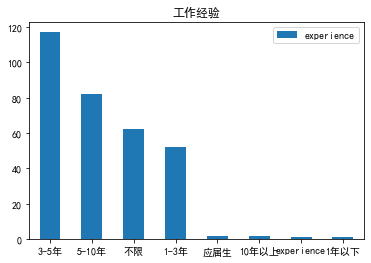

In [35]:
data['experience'].value_counts().plot(kind='bar',rot=0)
plt.title('工作经验')
plt.legend()
plt.show()

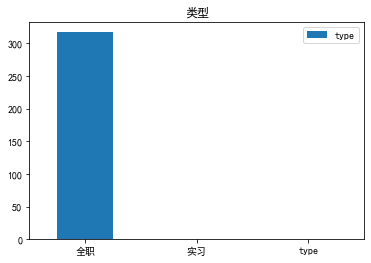

In [26]:
data['type'].value_counts().plot(kind='bar',rot=0)
plt.title('类型')
plt.legend()
plt.show()

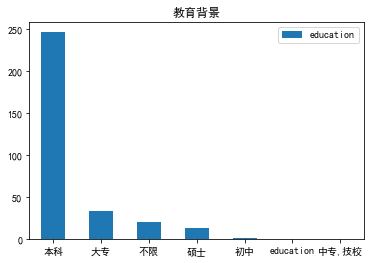

In [27]:
# 教育背景
data['education'].value_counts().plot(kind='bar',rot=0)
plt.title('教育背景')
plt.legend()
plt.show()

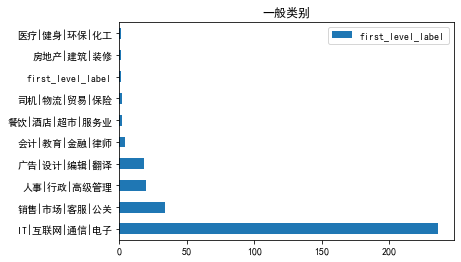

In [41]:
# 岗位类别(细分)
data['first_level_label'].value_counts().plot(kind='barh',rot=0)
plt.title('一般类别')
plt.legend()
plt.show()

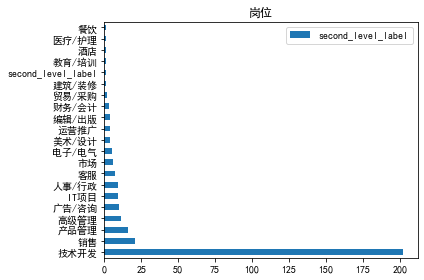

In [138]:
# 岗位类别(大类别)
data['second_level_label'].value_counts().plot(kind='barh',rot=0)
plt.title('岗位')
plt.legend()
plt.tight_layout()
plt.show()

In [149]:
final = ''
stopwords = ['相关','工作','负责','进行','行业','优先','项目','要求','任职','客户','平台','系统','应用','开发']
for n in range(data.shape[0]):
    seg_list = list(jieba.cut(data['companydescription'][n]))
    for seg in seg_list:
        if seg not in stopwords:
            final += seg + ' '

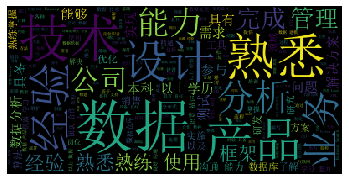

In [150]:
my_wordcloud = wordcloud.WordCloud(font_path = r'C:\Windows\Fonts\simsun.ttc').generate(final)
plt.imshow(my_wordcloud)
plt.axis('off')
plt.show()

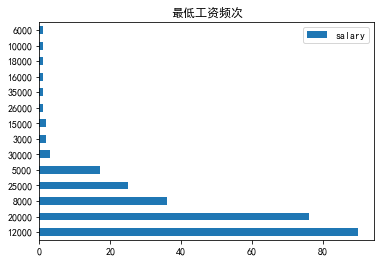

In [135]:
data['salary'] = data['salary'].str.extract('(\d+)')
data['salary'].value_counts().plot(kind='barh',rot=0)
plt.title('最低工资频次')
plt.legend()
plt.show()

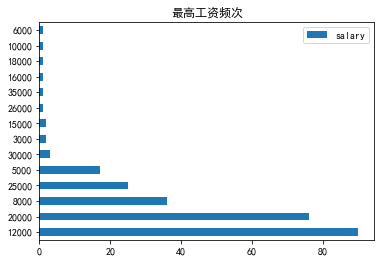

In [134]:
data['salary'] = data['salary'].str.extract('-(\d+)')
data['salary'].value_counts().plot(kind='barh',rot=0)
plt.title('最高工资频次')
plt.legend()
plt.show()